# Reanalysis of Fukumoto et al. 2021
## Background
A paper recently published in *Nature Medicine*, [Fukumoto et al., 2020](https://doi.org/10.1038/s41591-021-01571-8), tried to assess the government-led school closure policy during the early phase of the COVID-19 pandemic in 2020 in Japan. They compared the reported incidence rates between municiparities that had and had not implmented school closure in selected periods from March–May 2020, where they rigourously matched potential confounders, and claimed that they found no causal effect of school closure on the incidence rates of COVID-19. School closure as a means to control outbreaks has been studied mostly for influenza prior to the emergence of COVID-19 and previous evidence has been mixed. It should be noted that sometimes decisions for preemptive measures needed to be made in the lack of sufficient evidence in the earliest phase of the pandemic; nonetheless, such decisions should undergo post-hoc policy assessment to provide insights and refinement for future pandemic responses.

One of the largest challenges in this type of analysis of the early COVID-19 epidemic in Japan is the limited statistical power due to low case counts. During the first wave of the epidemic from February to June 2020 that overlapped with Fukumoto et al.'s study period, Japan never observed more than 1,000 COVID-19 cases per day. As a result, out of the total 79,989 municipality-level daily counts from the 847 municipalities included in Fukumoto et al., 99.9% were less than 10 cases per day (original study, Figure S2). Moreover, matching technique used to minimise possible confounding has a known side effect of limiting statistical power, especially when there is little overlap in the feature variables between the treatment and control groups.

Unfortunately, Fukumoto et al. is not excempt from this issue and appears to suffer insufficient statistical power. The study title says "No causal effect", which is a rather strong statement given the substantial uncertainty in estimates and potentially misspecified confidence intervals. As the saying goes, "absence of evidence is not evidence of absence"—when the uncertainty range covers practically meaningful values, it should not be prematurely concluded that there is "no effect" just because the effect estimates is statistically insignificant. Here we highlight limitations of the analysis and discuss possible factors that may have rendered the study underpowered.

## Relative ATC and ATT estimates
The original study measures the effect of school closure as the absolute difference in incidence rates between treatment (i.e. with school closure) and control municipalities. Such handling of treatment effect is rather rare in epidemiology. The theoretical ground is unclear for assuming that school closure would cause additive changes to the incidence rate per capita. Relative changes are often used to measure intervention effects in epidemiology, which would be more intuitive and fit to the purpose of the original study. It should also be noted that since incidence rates in the treatment group can only take non-negative values, the absolute mitigating effect of school closure as estimated in the original study can only be as high as the average incidence rate in the control group. 

To improve the interpretability of the results and discuss practical (not statistical) significance, we rescaled the reported average treatment effects (average treatment effect on the control: ATC and average treatment effect on the treatment: ATT) and their confidence intervals as relative changes from the average outcome (incidence rate per capita) in the control group. The confidence intervals of the relative ATC and ATT cover most of the regions from 100% reduction to 100% elevation, suggesting the underpowered nature of the original study. Not only sufficiently large effects such as 50% relative reduction (i.e. -50% relative effect) in incidence rates (which most experts would agree is of practical significance), even complete reduction (relative effect of -100%) is within the confidence intervals for the substantial part of the period of interest.

Part of the limitation to the statistical power may be due to the use of matching. Since a subset of samples are either excluded or duplicated due to matching with replacement used in the analysis, the effective sample size (ESS) of the resulting matched samples became smaller than the number of unique municipalities in the matched samples, let alone that in the original dataset. Because incidence of infectious diseases typically exhibit high dispersion due to its self-exciting nature (i.e. an increase in the number of cases induces a further increase via transmission), the required sample size to find a statistical difference can be larger than typical settings with independent and identically-distributed samples.

In [1]:
## setup
# load packages
libnames=(c("repr","data.table","WeightIt","MatchIt","cobalt","matrixStats","survey","glmnet","glmnetUtils","CBPS","zoo","tidyverse"))
libs=sapply(libnames,function(x){suppressPackageStartupMessages(library(x,warn.conflicts=F,character.only=T))})
# run original source to reproduce Fig 1
source("Fukumoto2021/matching.R",chdir=T)
# run original source to reproduce Fig 5
source("Fukumoto2021/att.R",chdir=T)
# load plotting function
source("src/relATplot.R",chdir=T)

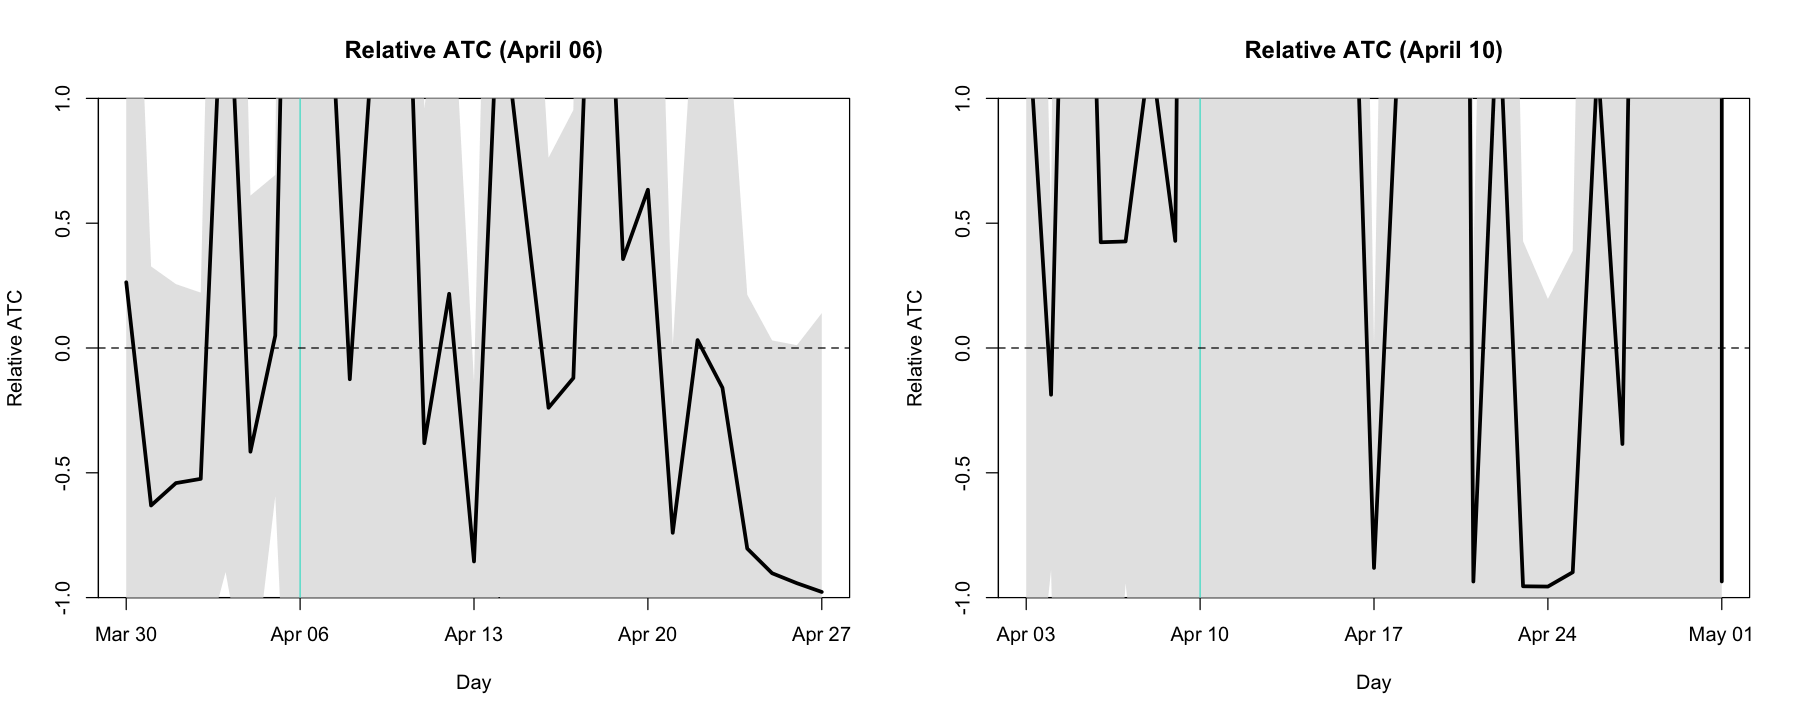

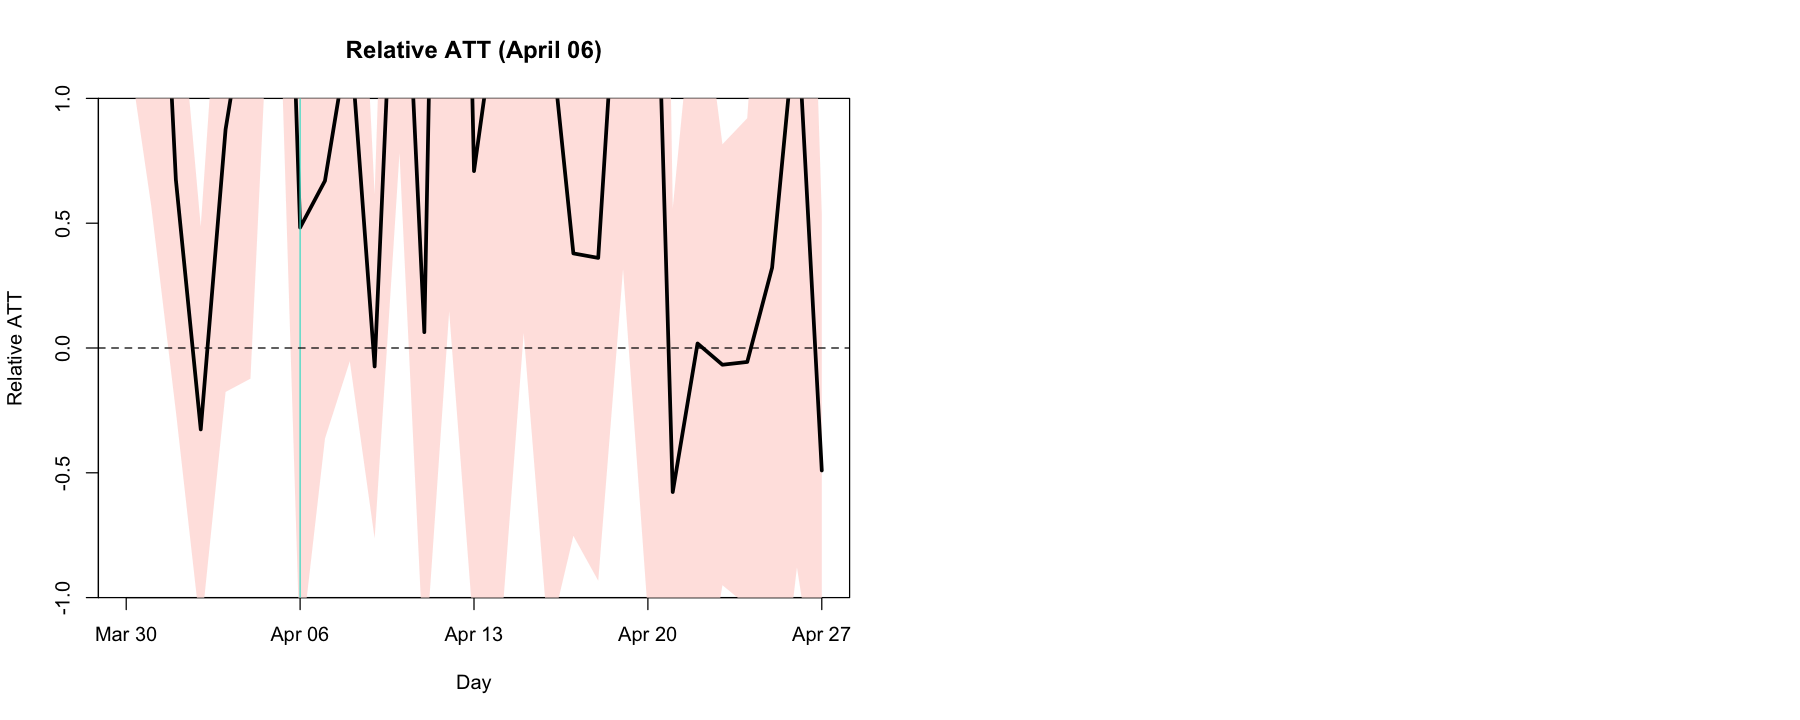

In [2]:
# Relative ATC
#options(repr.plot.width=10,repr.plot.height=4)
options(repr.plot.width=15,repr.plot.height=6)
par(mfrow=c(1,2))
figlabels=c("1_e","1_f")
ATCApr6=relATplot(figlabels, "ATC")
figlabels=c("1_g","1_h")
ATCApr10=relATplot(figlabels, "ATC")
# Relative ATT
figlabels=c("5_a","5_b")
ATTApr6=relATplot(figlabels, "ATT",shadecolor="mistyrose1")

Figure 1. Relative ATC and ATT

In [3]:
esstables=lapply(list(ATCApr6=ATCApr6,ATCApr10=ATCApr10,ATTApr6=ATTApr6),function(x){x$matchingsummary$nn})
esstables
mergedtable=cbind(esstables[[1]],esstables[[2]],esstables[[3]])[c(2,4,3),]%>%round(.,1)
rownames(mergedtable)[3]="ESS"
mergedtable

,Control,Treated
All (ESS),483,256.00000
All,483,256.00000
Matched (ESS),483,37.47614
Matched,483,99.00000
Unmatched,0,157.00000
Discarded,0,0.00000
,Control,Treated
All (ESS),307,491.00000
All,307,491.00000
Matched (ESS),307,53.45944


,Control,Treated,Control,Treated,Control,Treated
All,483,256.0,307,491.0,483.0,256
Matched,483,99.0,307,92.0,99.0,256
ESS,483,37.5,307,53.5,47.6,256


Table 1. Effective sample size of matched samples 

## Statistical power demonstration with assumed causal mitigating effect of 50%/80%
To further examine the statistical power of this study setting, we artificially modified the dataset such that school closure has exactly 50% or 80% mitigating effect on the incidence rate per capita. On the treatment reference date (April 6) and onward, the expected incidence rate of each municiparity in the treatment group was assumed to be 50%/20% that of the matched control municipality.

To roughly simulate estimation and sampling errors in a convenience approach, we added gaussian noises to the outcome of each control municipality to construct the outcome of the matched municipality. Let $C_i$ be the outcome variable of a control municipality $i$. We assumed that the posterior distribution for the true mean for this outcome $E(C_i)$ is normally distributed around the observed value. We also assumed that $C_i$ is a Poisson-distributed random variable divided by population size and used a variance equal to the mean. 
$$
E(C_i)\sim\mathcal{N}(C_i,\sqrt{C_i})
$$
The outcome of the matched treatment municipality is then sampled from another Poisson-approximating normal distribution with a relative reduction of $\epsilon = 0.5, 0.8$.
$$
T_i\sim\mathcal{N}((1-\epsilon)E(C_i),\sqrt{(1-\epsilon)E(C_i)})
$$
The results suggest that, even with as much as 50%/80% mitigating effect, the approach in the original study may not have been able to find statistical significance. The absolute ATT for the 50% mitigating effect (Figure 2, top middle panel) appears similar to what were referred to as "no effect" in the original study. ATT for the 80% mitigating effect shows a weak trend towards mitigation, yet is statistically insignificant (Figure 2, bottom middle panel). Similarly, the estimates for ATC showed either statistically insignificant or barely significant results (Figure S1), suggesting the study was underpowered to find even moderate to high mitigating effect, if any.

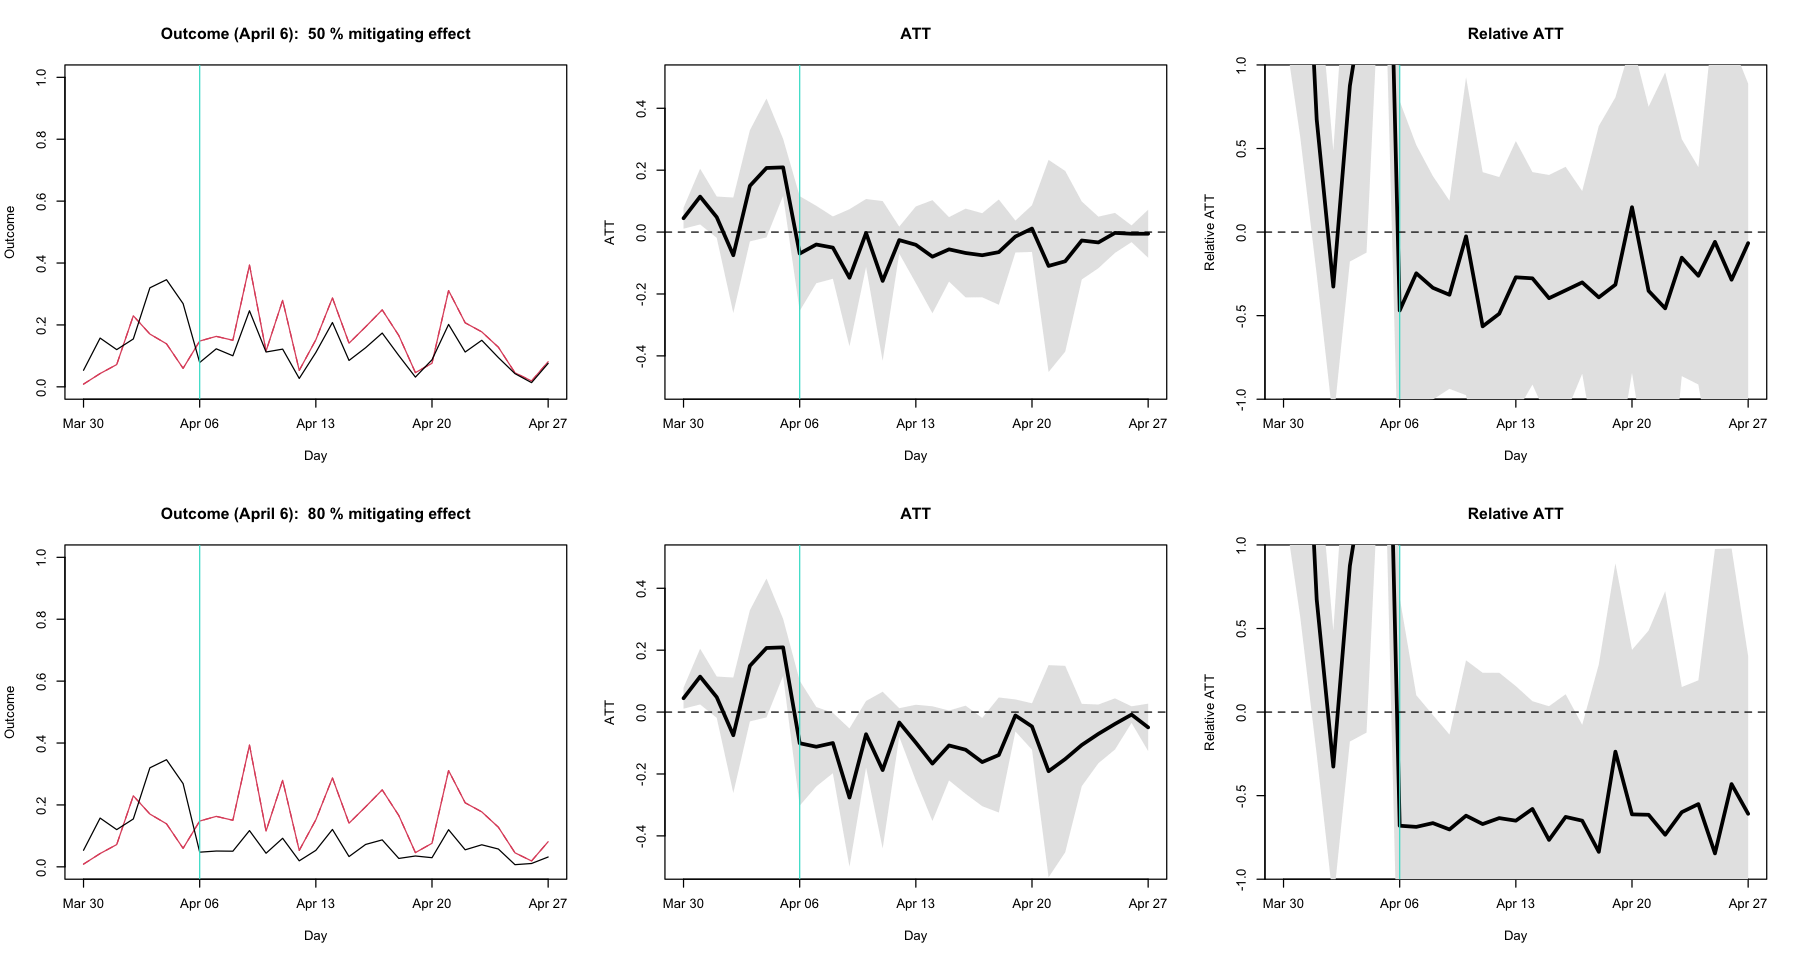

In [4]:
## ATT on April 6
#options(repr.plot.width=10,repr.plot.height=16/3)
options(repr.plot.width=15,repr.plot.height=8)
set.seed(2021)
par(mfrow=c(2,3))

# 50% reduction
nullfrom=8
shadecolor="gray90"
reduction=0.5
source("src/att_beta.R",chdir=T)
figlabels=c("5_a_beta","5_b_beta")
relATplot(figlabels, "ATT",shadecolor="gray90",dir="output/",titlewithdate=F,returnmatch=F)

# 80% reduction
reduction=0.8
source("src/att_beta.R",chdir=T)
figlabels=c("5_a_beta","5_b_beta")
relATplot(figlabels, "ATT",shadecolor="gray90",dir="output/",titlewithdate=F,returnmatch=F)

Figure 2. Simulated ATT with assumed 50%/80% causal mitigating effect

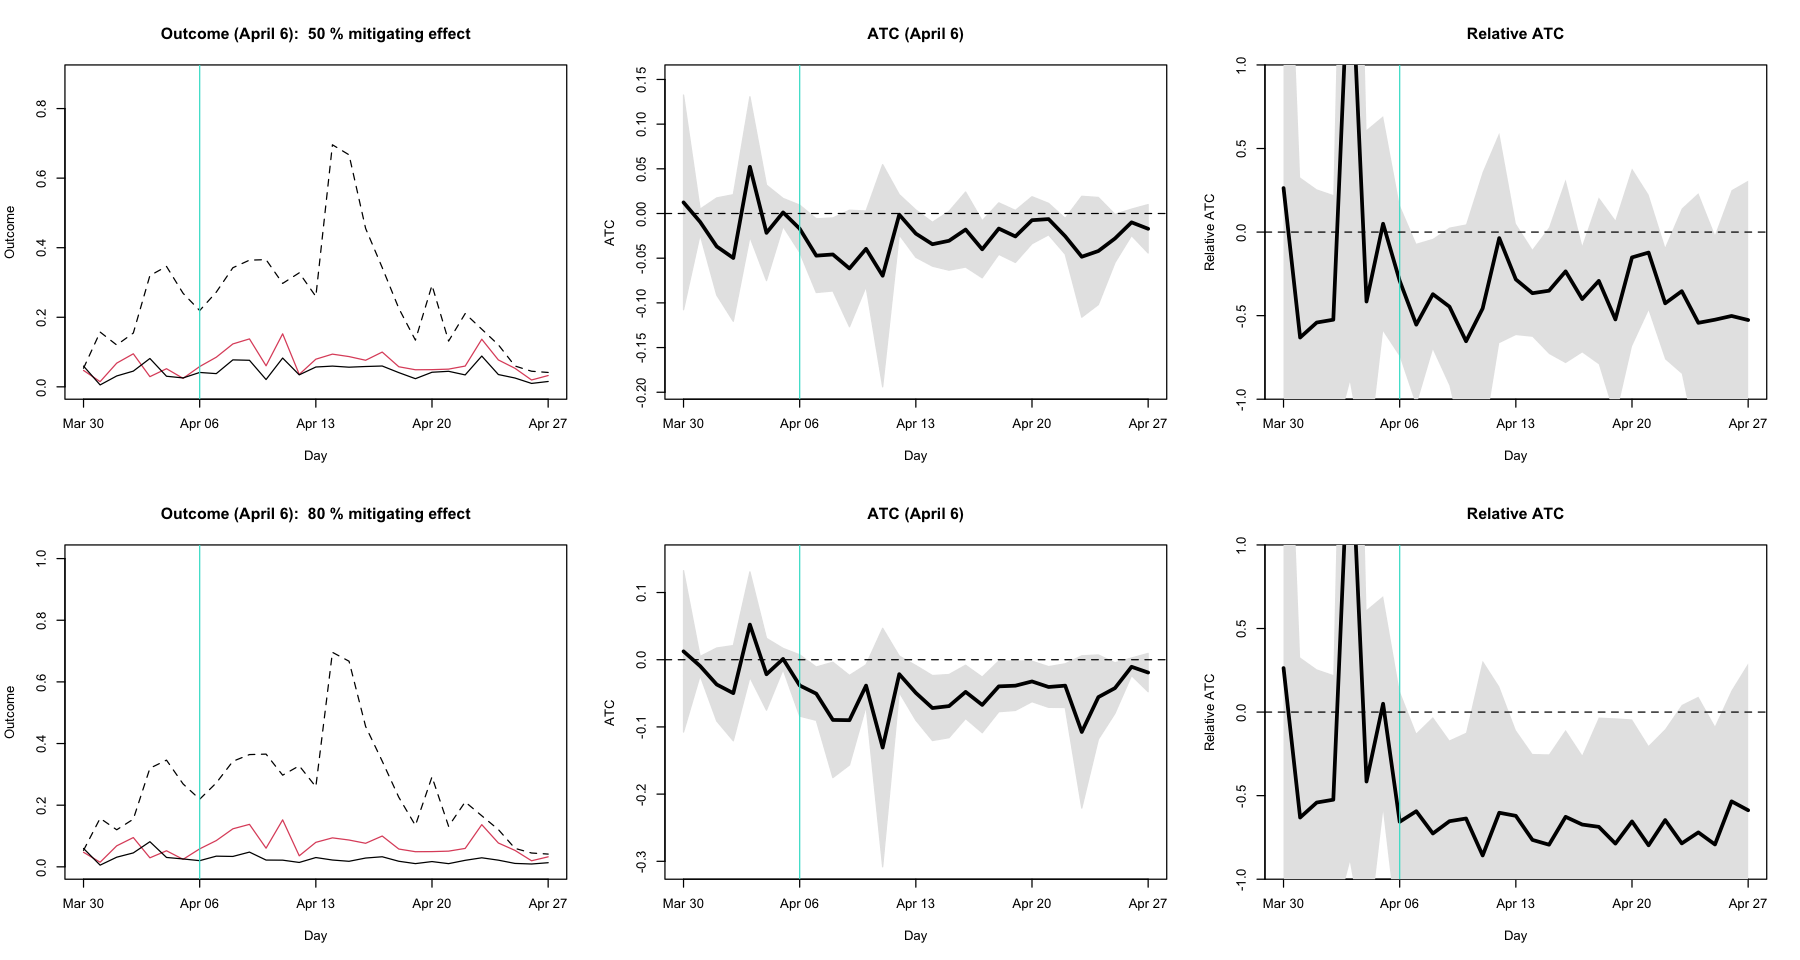

In [5]:
## ATC on April 6
#options(repr.plot.width=10,repr.plot.height=16/3)
options(repr.plot.width=15,repr.plot.height=8)
set.seed(11)
par(mfrow=c(2,3))
nullfrom=8
shadecolor="gray90"
reduction=0.5
source("src/atc_beta.R",chdir=T)
figlabels=c("1_e_beta","1_f_beta")
relATplot(figlabels, "ATC",shadecolor="gray90",dir="output/",titlewithdate=F,returnmatch=F)
reduction=0.8
source("src/atc_beta.R",chdir=T)
figlabels=c("1_e_beta","1_f_beta")
relATplot(figlabels, "ATC",shadecolor="gray90",dir="output/",titlewithdate=F,returnmatch=F)

Figure S1. Simulated ATT with assumed 50%/80% causal mitigating effect

## Supplementary analysis: overfitting in inverse probability weighting (Extended Fig. 4 of the original study)
We also report that one of the subanalyses that authors included, inverse-probability weighting using propensity scores, needs improvement. By computing the effective sample size, we found that the most samples were essentially lost (Table S1) due to the substantial imbalance in the assigned weights (Figure S2). Of note, all samples in the treatment groups received zero weights (handled as 1e-6 by the {WeightIt} R package) because propensity scores in the treatment and control groups are completely separated and thus no sample in the treatment group were comparable to the control group (Figure S2 bottom panel).

This likely happended due to overfitting of the regression model for propensity score assignment. Over 70 variables were included in the model and as a result, a number of regression coefficients had extremely large values (Table S2). Of note, the majority of those coefficients were for prefecture indicator variables (labelled as V1–25), which adds around 50 to 350 to the linear predictor of municipalities in the corresponding prefecture. To address this issue, the degree of model complexity needs to be controlled by, for example, regularisation.

In [6]:
wout0406 <- readRDS("Fukumoto2021/ipw/results/w.out_0406.RDS")
wout0410 <- readRDS("Fukumoto2021/ipw/results/w.out_0410.RDS")
makeesstable<-function(wout){
    rbind(All=c(Control=length(wout$weights[wout$treat!=1]),Treated=length(wout$weights[treat==1])),
          ESS=c(Control=WeightIt::ESS(wout$weights[wout$treat!=1]%>%round(.,5)),Treated=WeightIt::ESS(wout$weights[wout$treat==1]%>%round(.,5))),
         maxweight=c(Control=max(wout$weights[wout$treat!=1]%>%round(.,5)),Treated=max(wout$weights[wout$treat==1]%>%round(.,5))))
}
lapply(list(ATCApr6=wout0406,ATCApr10=wout0410),makeesstable)

,Control,Treated
All,483,256.00000
ESS,483,9.40683
maxweight,1,41.08801
,Control,Treated
All,307,267
ESS,307,NaN
maxweight,1,0


Table S1. The effective sample size and the maximum weight of inverse probability weighted samples

In [7]:
source("src/ipw_obj.R",chdir=T)
source("src/displayfunctions.R",chdir=T)

Warning message:
“Some extreme weights were generated. Examine them with summary() and maybe trim them with trim().”


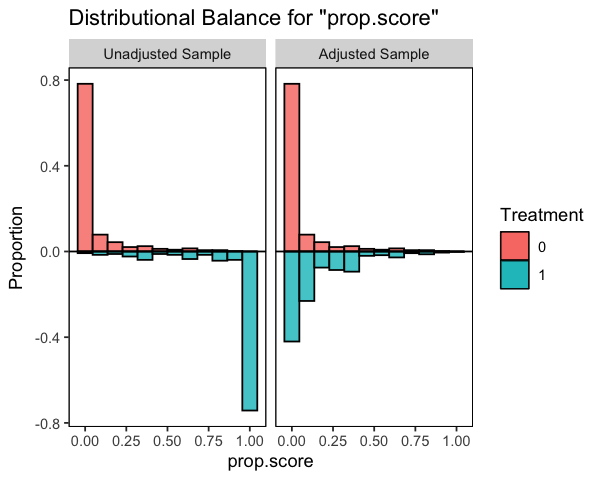

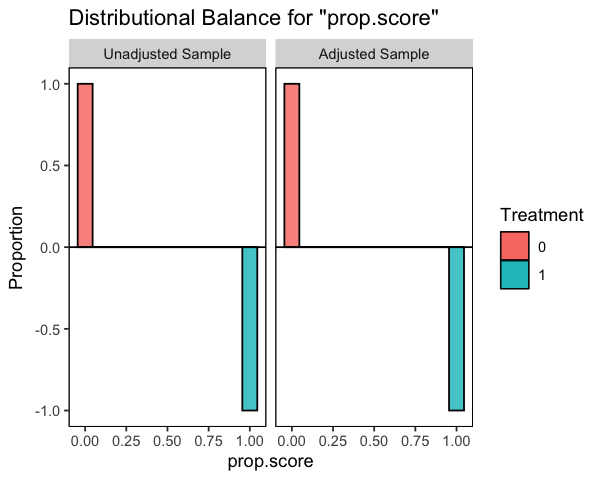

In [8]:
options(repr.plot.width=5,repr.plot.height=4)
balplot(wout0406)
balplot(wout0410)

Figure S2. The distribution of propensity scores before and after inverse probability matching

In [9]:
list(ATCApril6=coefmat(W.out0406),ATCApril10=coefmat(W.out0410))

,coefficient,standardized.coefficient,covariate.min,covariate.max
prec_mean,0.2590708,129.452115,1004.075000,4201.26299
shine_mean,2.2027064,412.101321,1328.095442,2173.55625
tmean_mean,-2.5638202,-6.532979,4.982759,22.31176
V3,-23.4008241,-5.657522,0.000000,1.00000
V9,42.8865502,6.433744,0.000000,1.00000
V10,37.7644922,8.346109,0.000000,1.00000
V11,42.2658360,11.007311,0.000000,1.00000
V13,33.3330646,7.808429,0.000000,1.00000
V19,-42.8476829,-7.600385,0.000000,1.00000
,coefficient,standardized.coefficient,covariate.min,covariate.max


Table S2. Selection of regression coefficients for propensity score assignment suggesting overfitting. Coefficients whose standardised value has over 5 are listed.

## Lasso regression for propensity scores
We incorporated Lasso regularisation to address the issue of overfitting. The hyperparameter (regularisation parameter $\lambda$) was optimised via 10-fold cross validation. Although both the propensity score imbalance and effective sample size slightly improved, they are still suboptimal for reliable estimation (Figures S3, S4 and Table S3). The estimation results did not show any notable patterns (except for a surge in ATC immediately after the intervention on April 10, which is presumably an artifact).

The fact that the regularised model with the best cross-validation performance still produced highly dichotomised propensity scores may warrant attention. Assuming that the original choice of covariates reflecting the authors' expert knowledge were plausible, the optimal model based on prediction accuracy within this covariate set may reasonably represent the mechanism of treatment assignment. In this case, the positivity assumption required for causal inference may be (nearly) violated, i.e. the treatment assignments for the included municipalities were mostly deterministic and thus estimation can become unstable and/or biased.

Note that the genetic matching in the main analysis of the original study did not use propensity scores and therefore was not affected by the overfitting observed in their IPW analysis. However, this means that the covariates were not weighted by their importance in determining treatment assignment, whereas supplying propensity scores in genetic matching is generally recommended wherever possible (Diamond and Sekhon, 2012). If, for example, the treatment assignment was strongly determined by a small subset of confounders which did not receive large weights in Mahalanobis distance matching (and therefore was not prioritised over other variables in the matching process), the bias arising from these confounders may remain unadjusted for. In this light, it would be worth checking the robustness of the main analysis by performing another genetic matching including propensity scores and a caliper (to ensure the matched pairs have sufficiently similar features) and confirming that it yields successful matching with a sufficient effective sample size.

In [10]:
#suppressWarnings(source("src/ipw_lasso.R",chdir=T))
cvl0406 <- readRDS(paste0("output/ipw_lasso_", "0406",".rds"))
cvl0410 <- readRDS(paste0("output/ipw_lasso_", "0410",".rds"))

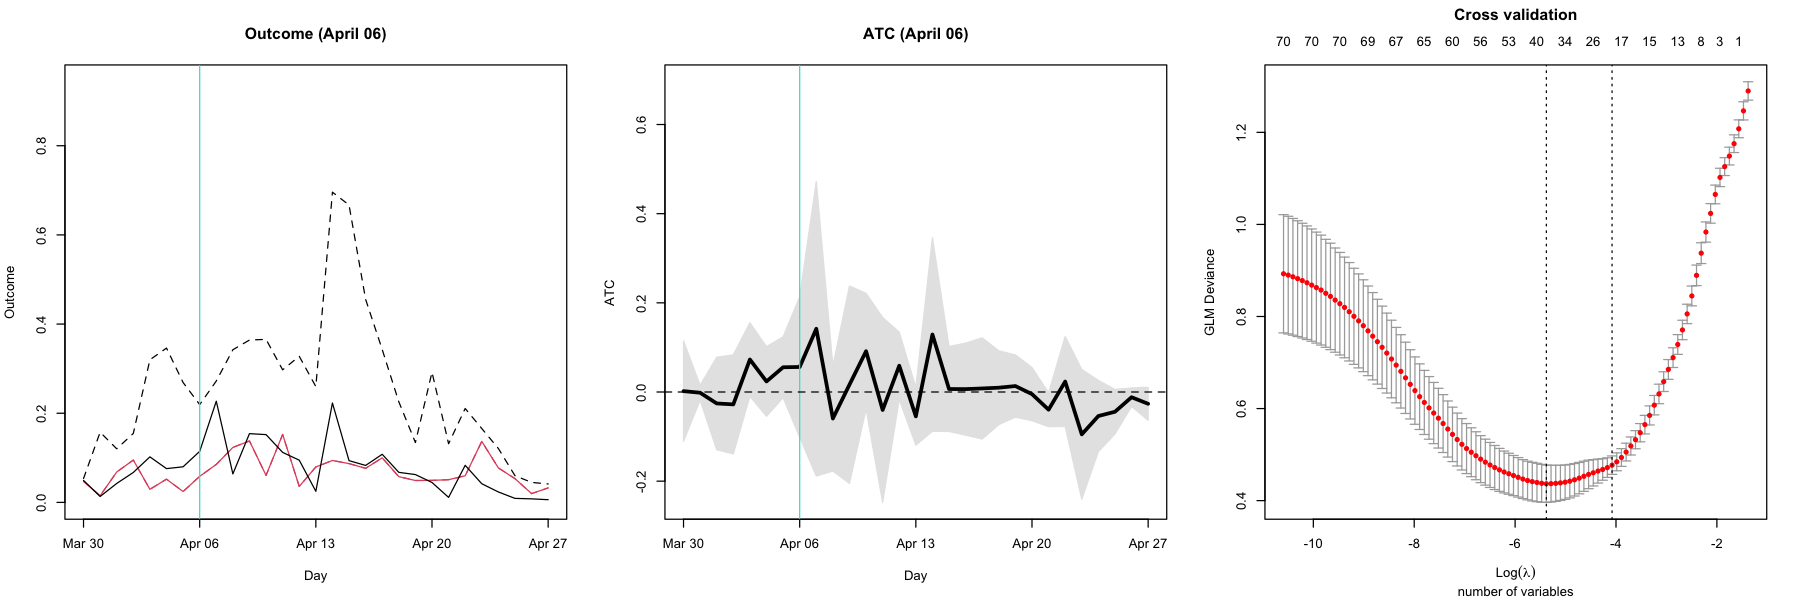

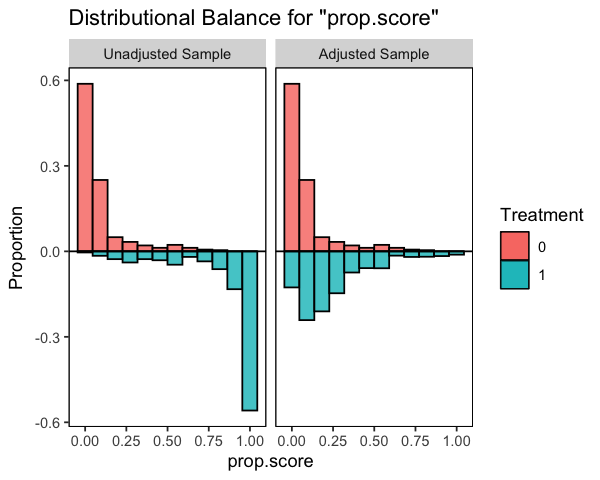

In [11]:
options(repr.plot.width=15,repr.plot.height=5)
par(mfrow=c(1,3))
plot_ipw_lasso("0406",cvl0406)
options(repr.plot.width=5,repr.plot.height=4)

balplot(cvl0406$wout)

Figure S3. ATC estimation with Lasso regression for propensity scores and the propensity score balance (April 6)

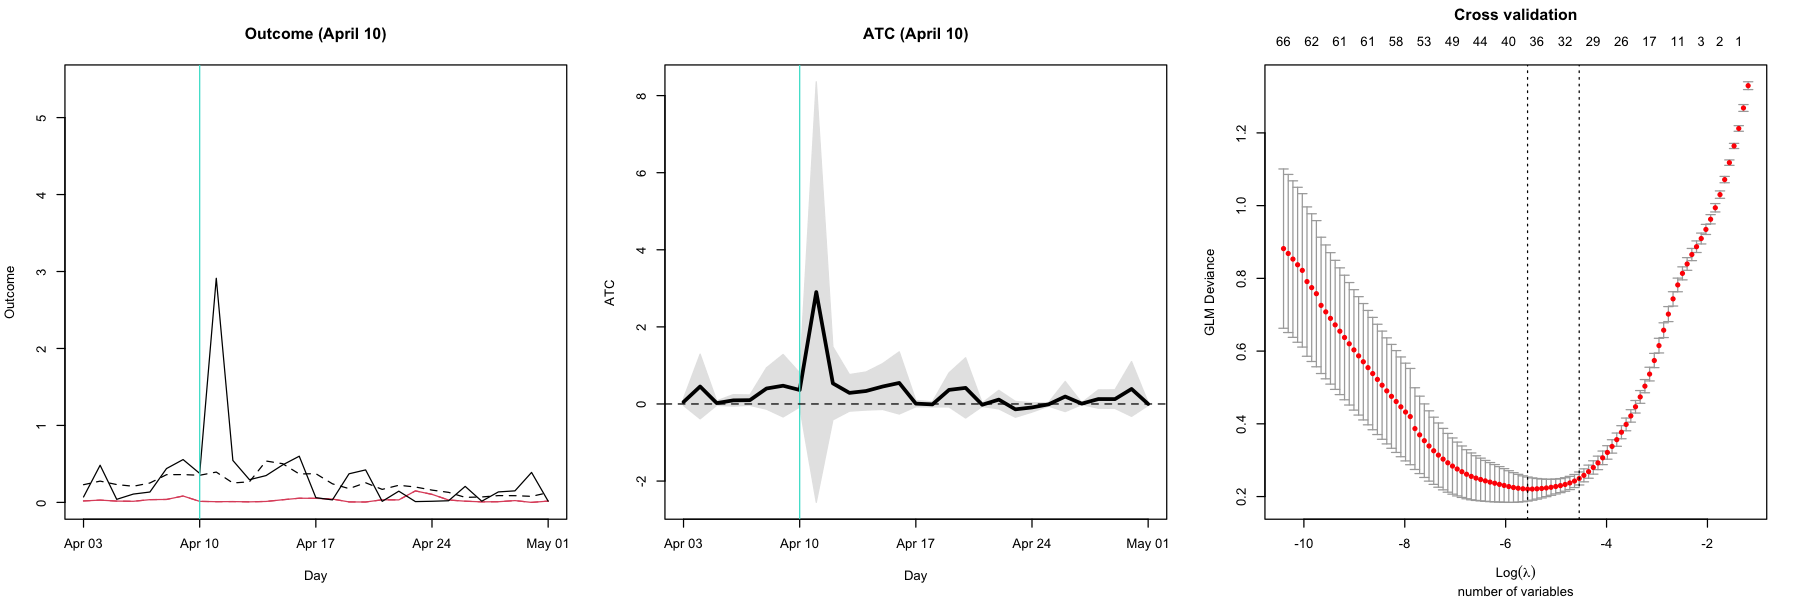

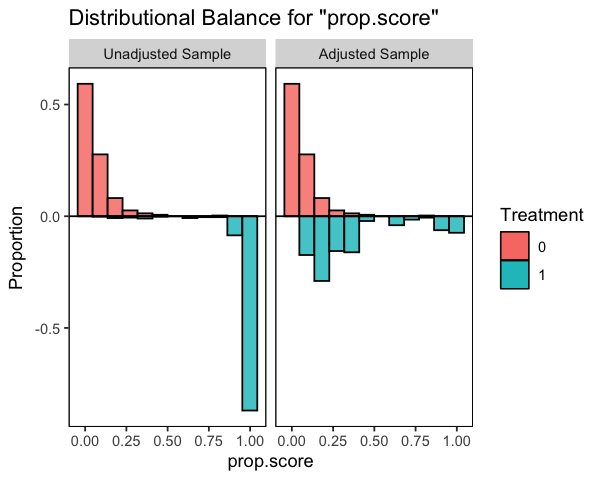

In [12]:
options(repr.plot.width=15,repr.plot.height=5)
par(mfrow=c(1,3))
plot_ipw_lasso("0410",cvl0410)
options(repr.plot.width=5,repr.plot.height=4)
balplot(cvl0410$wout)

Figure S4. ATC estimation with Lasso regression for propensity scores and the propensity score balance (April 10)

In [13]:
lapply(list(ATCApr6_IPW=cvl0406$wout,ATCApr10_IPW=cvl0410$wout),makeesstable)
coefmat(cvl0406,0)
coefmat(cvl0410,0)

,Control,Treated
All,483,491.00000
ESS,483,23.70586
maxweight,1,22.05127
,Control,Treated
All,307,491.00000
ESS,307,15.13974
maxweight,1,9.79839


,coefficient,standardized.coefficient,covariate.min,covariate.max
(Intercept),-1.027284e+01,NA,NA,NA
tmean_mean,3.088865e-02,0.078708689,4.9827586,2.231176e+01
age.0406,-2.441299e-02,-0.216271813,28.0000000,8.600000e+01
win_count.0406,2.333247e-01,0.265095459,1.0000000,5.000000e+00
shutdown.0316,1.338078e+00,0.255649475,0.0000000,1.000000e+00
prior.infection.per.capita,9.208795e+03,0.281923521,0.0000000,3.154574e-04
cases_1,4.490731e+04,0.244559871,0.0000000,5.047446e-05
cases_2,1.608685e+03,0.020776727,0.0000000,3.154574e-04
cases_3,3.443955e+04,0.266818033,0.0000000,1.414387e-04
cases_4,-2.169911e+04,-0.180540886,0.0000000,1.586043e-04


,coefficient,standardized.coefficient,covariate.min,covariate.max
(Intercept),-1.909641e+01,NA,NA,NA
tmean_mean,-6.352318e-02,-0.15987106,4.98275862,2.231176e+01
win_count.0410,-7.559535e-02,-0.08771408,1.00000000,6.000000e+00
shutdown.0406,5.809464e+00,2.83164688,0.00000000,1.000000e+00
prior.infection.per.capita,6.899070e+03,0.32531275,0.00000000,4.839100e-04
cases_1,1.265753e+04,0.13938763,0.00000000,1.816530e-04
cases_2,2.387408e+04,0.30647224,0.00000000,2.337978e-04
cases_3,6.118991e+04,0.41394371,0.00000000,9.351912e-05
cases_4,3.719686e+03,0.02949199,0.00000000,1.431229e-04
A6103,2.451585e+00,0.23639350,0.00000000,4.785379e-01


Table S3. Effective sample size and selected variables in Lasso regression

## Conclusion
Our reanalysis of Fukumoto et al. suggested that the study was underpowered to identify the presence of causal mitigating effect of school closure on COVID-19 incidence. While we recognise the importance of the authors' attempt to assessing the school closure policy given its collateral effect imposed onto students and their family, we argue that their conclusion of "no causal effect" was not strongly supported by data due to the limited statistical power. The effective sample sizes of matched arms were around 40–50 for the main analysis, which was likely insufficient to find a difference between COVID-19 incidence rates with a substantial variation. The observed separation in propensity scores, which remained even after suppression of overfitting, suggested that there may have been little randomness in the treatment assignment (i.e. whether a municipality is assigned to the treatment or control groups are almost completely predictable from its covariates), limiting the possibility of quasi-experimental analysis within the available data. Finding no mitigating effect of school closure is not surprising in itself because children were not the major drivers of the outbreak especially in the earliest period (Davis et al. 2020); nontheless, an empirical evidence claiming "no effect" would need to at least show the effect is below the level of practical significance to appear convincing.

Altogether, these limitations represent difficulties in post-hoc causal analysis of mass interventions. As the school closure policy in Japan was recommended universally, the number of municipalities was unbalanced between the treatment and control groups for most of the study period. For the rest of the study period when the assignment was balanced, each municipality likely opted for closing or not closing schools based on their situation including COVID-19 incidence, demographic factors, etc., introducing confounding that might not have been fully addressed with the available sample size. Policy assessments are often infeasible in retrospect, especially when they are implemented without a built-in evaluation plan. Fukumoto et al.'s "negative data", as in the dataset that did not have a sufficient statistical power to assess the intervention, highlights the importance of policy planning coupled with the "evidence-generating" design, as has been proposed for medical practices (Embi et al., 213).

## References
* Fukumoto, K., McClean, C.T. & Nakagawa, K. No causal effect of school closures in Japan on the spread of COVID-19 in spring 2020. Nat Med (2021). https://doi.org/10.1038/s41591-021-01571-8
* Diamond, A., Sekhon, J.S.; Genetic Matching for Estimating Causal Effects: A General Multivariate Matching Method for Achieving Balance in Observational Studies. The Review of Economics and Statistics (2013). 95(3):932–945. doi: https://doi.org/10.1162/REST_a_00318
* Davies, N.G., Klepac, P., Liu, Y. et al. Age-dependent effects in the transmission and control of COVID-19 epidemics. Nat Med (2020). 26:1205–1211 (2020). https://doi.org/10.1038/s41591-020-0962-9
* Embi, P.J., Payne, P.R.O. Evidence Generating Medicine, Med Care 2013. 51(8 Suppl 3):S87-91. https://doi.org/10.1097/MLR.0b013e31829b1d66.51